In [3]:
# results.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import glob
from datetime import datetime

plt.style.use('dark_background')

## Import selected CSV files

In [ ]:

csv_files = [
  #  "exports/performance_metrics_20250908_172508.csv",
    "exports/performance_metrics_20250908_173226.csv",
]

# Read and concatenate
dfs = [pd.read_csv(f, parse_dates=['timestamp']) for f in csv_files]
data = pd.concat(dfs, ignore_index=True)

data.head(2)

,timestamp,system_cpu_percent,system_memory_percent,system_memory_used_gb,system_memory_available_gb,fastapi_healthy,fastapi_response_time_ms,fastapi_cpu_percent,fastapi_cpu_percent_raw,fastapi_cores_used,...,fastapi_detections,springboot_healthy,springboot_response_time_ms,springboot_cpu_percent,springboot_cpu_percent_raw,springboot_cores_used,springboot_memory_mb,springboot_threads,springboot_fps,springboot_detections
0,2025-09-08 17:32:26.857877,0.0,76.2,6.23,3.80,True,8.871794,12.41,124.1,1.24,...,NaN,True,2.490282,5.19,51.9,0.52,548.21,104,NaN,NaN
1,2025-09-08 17:32:28.335615,65.4,76.1,6.23,3.82,True,3.079891,12.37,123.7,1.24,...,NaN,True,3.870964,5.59,55.9,0.56,551.08,104,NaN,NaN


## Compute descriptive statistics

In [12]:

metrics = {
    'FastAPI': ['fastapi_response_time_ms', 'fastapi_cpu_percent', 'fastapi_memory_mb'],
    'Spring Boot': ['springboot_response_time_ms', 'springboot_cpu_percent', 'springboot_memory_mb'],
    'System': ['system_cpu_percent', 'system_memory_percent']
}

desc_stats = {}
for app, cols in metrics.items():
    desc_stats[app] = data[cols].agg(['mean', 'median', 'min', 'max', 'std'])
    
# Display descriptive stats tables
for app, stats in desc_stats.items():
    print(f"\n=== {app} Metrics Descriptive Statistics ===")
    display(stats)


=== FastAPI Metrics Descriptive Statistics ===


,fastapi_response_time_ms,fastapi_cpu_percent,fastapi_memory_mb
mean,3.592356,19.324467,714.049477
median,2.889872,19.190000,736.640000
min,1.890182,4.860000,327.750000
max,30.368805,44.970000,902.420000
std,2.337932,5.322873,118.021573



=== Spring Boot Metrics Descriptive Statistics ===


,springboot_response_time_ms,springboot_cpu_percent,springboot_memory_mb
mean,4.145124,6.405211,416.251328
median,3.367901,5.740000,363.470000
min,1.989126,0.010000,243.850000
max,108.919859,31.990000,627.840000
std,5.116817,2.531773,86.640624



=== System Metrics Descriptive Statistics ===


,system_cpu_percent,system_memory_percent
mean,60.315292,63.452515
median,60.400000,60.700000
min,0.000000,44.400000
max,100.000000,84.400000
std,13.362485,11.785945


## Plot FastAPI vs Spring Boot CPU %

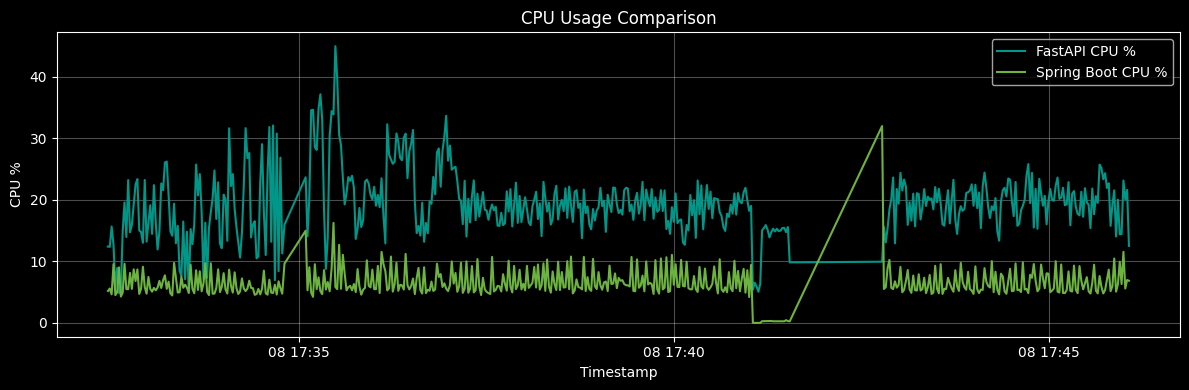

In [ ]:

plt.figure(figsize=(12, 4))
plt.plot(data['timestamp'], data['fastapi_cpu_percent'], label='FastAPI CPU %',
         color='#009688')
plt.plot(data['timestamp'], data['springboot_cpu_percent'], label='Spring Boot CPU %',
         color='#6db33f')
plt.title("CPU Usage Comparison")
plt.xlabel("Timestamp")
plt.ylabel("CPU %")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



## Plot FastAPI vs Spring Boot Memory (MB)

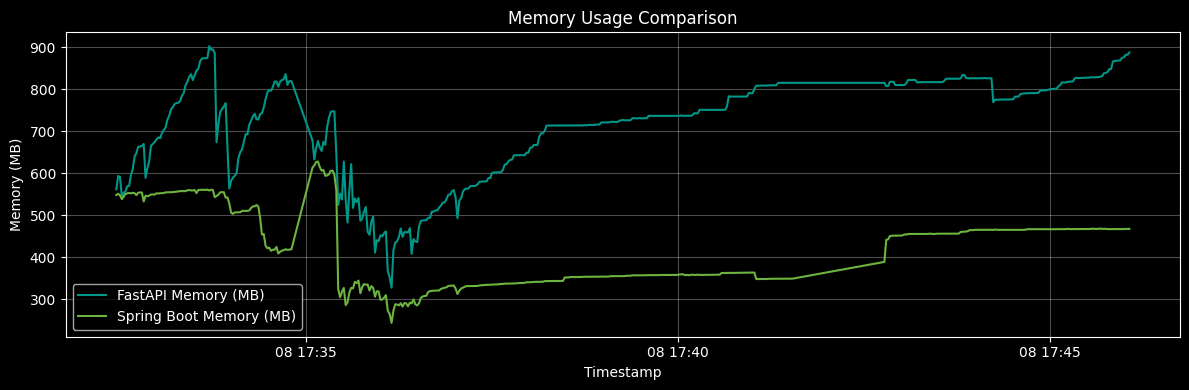

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(data['timestamp'], data['fastapi_memory_mb'], label='FastAPI Memory (MB)',
         color='#009688')
plt.plot(data['timestamp'], data['springboot_memory_mb'], label='Spring Boot Memory (MB)',
         color='#6db33f')
plt.title("Memory Usage Comparison")
plt.xlabel("Timestamp")
plt.ylabel("Memory (MB)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Plot FastAPI vs Spring Boot Response Time

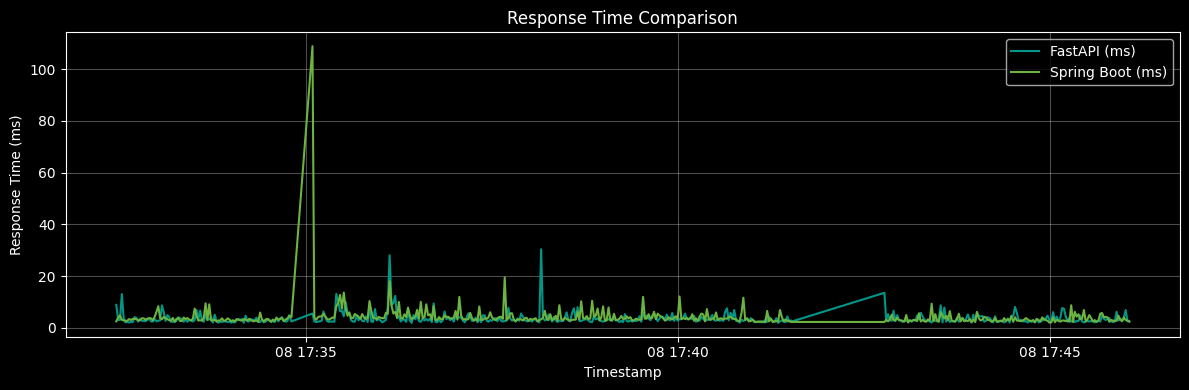

In [9]:

plt.figure(figsize=(12, 4))
plt.plot(data['timestamp'], data['fastapi_response_time_ms'], label='FastAPI (ms)',
         color='#009688')
plt.plot(data['timestamp'], data['springboot_response_time_ms'], label='Spring Boot (ms)',
         color='#6db33f')
plt.title("Response Time Comparison")
plt.xlabel("Timestamp")
plt.ylabel("Response Time (ms)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



## Plot System Metrics

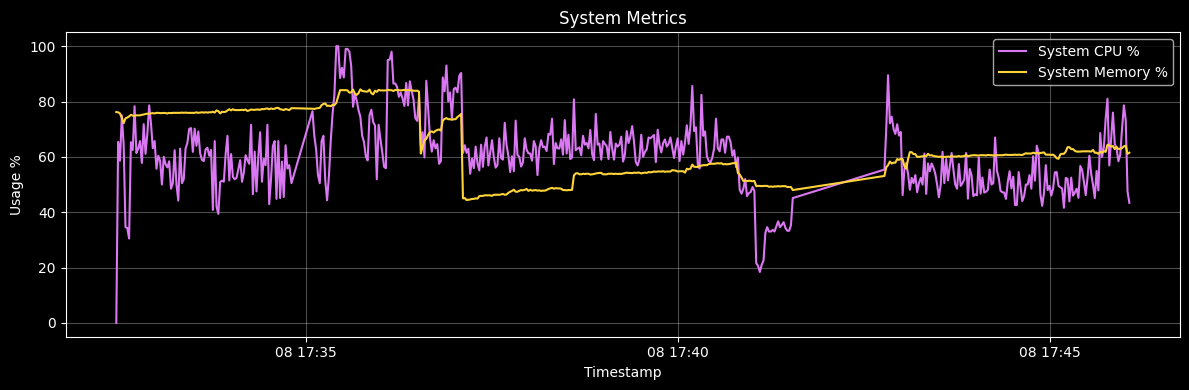

In [11]:

plt.figure(figsize=(12, 4))
plt.plot(data['timestamp'], data['system_cpu_percent'], label='System CPU %',
         color='#da77f2')
plt.plot(data['timestamp'], data['system_memory_percent'], label='System Memory %',
         color='#ffd43b')
plt.title("System Metrics")
plt.xlabel("Timestamp")
plt.ylabel("Usage %")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Threads comparison plot

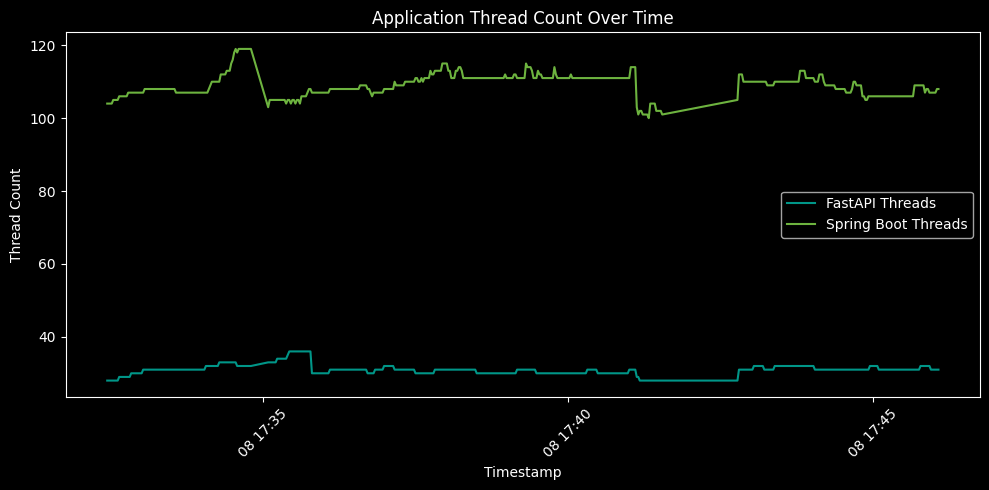

In [14]:

plt.figure(figsize=(10, 5))
plt.plot(data['timestamp'], data['fastapi_threads'], label='FastAPI Threads', color='#009688')
plt.plot(data['timestamp'], data['springboot_threads'], label='Spring Boot Threads', color='#6db33f')
plt.xlabel('Timestamp')
plt.ylabel('Thread Count')
plt.title('Application Thread Count Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Descriptive statistics for threads

In [15]:

threads_stats = pd.DataFrame({
    'FastAPI Threads': [data['fastapi_threads'].mean(), data['fastapi_threads'].median()],
    'Spring Boot Threads': [data['springboot_threads'].mean(), data['springboot_threads'].median()]
}, index=['Mean', 'Median'])

display(threads_stats)

,FastAPI Threads,Spring Boot Threads
Mean,30.987928,109.080483
Median,31.000000,109.000000


## Unified Metrics Plot

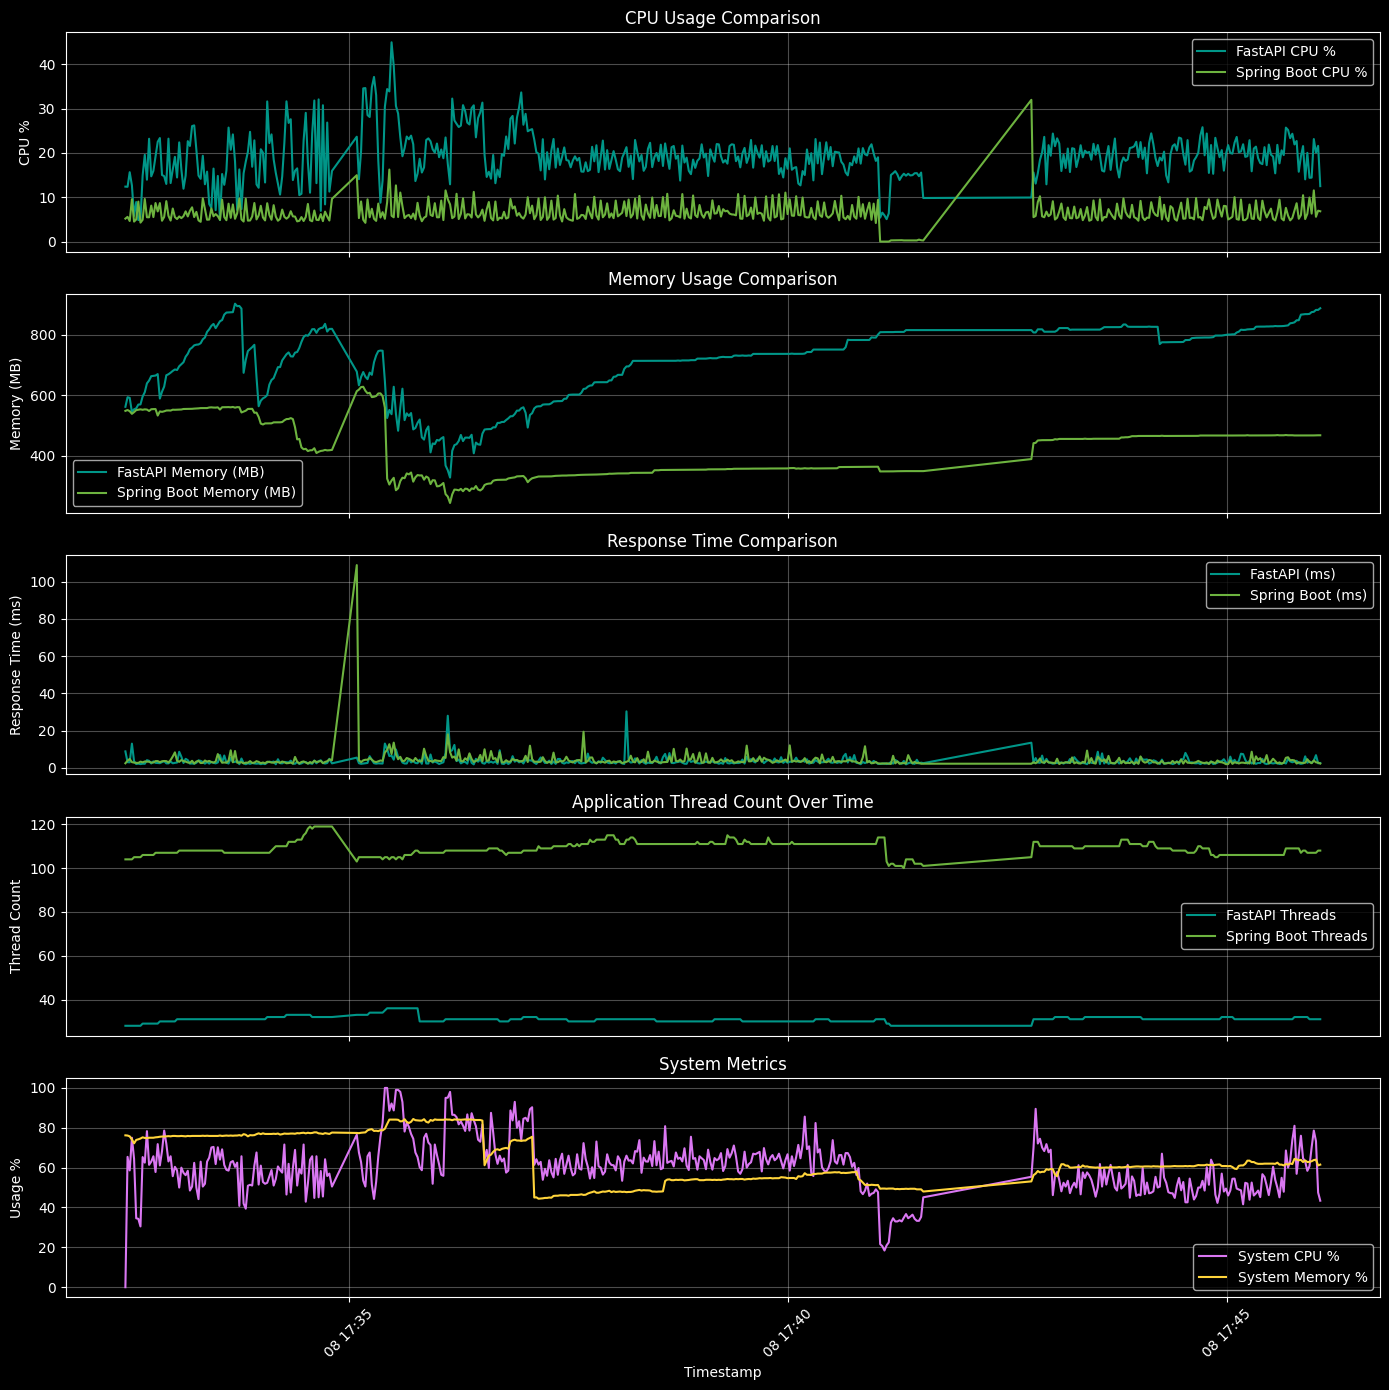

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(14, 14), sharex=True)

# 1️⃣ CPU Usage Comparison
axs[0].plot(data['timestamp'], data['fastapi_cpu_percent'], label='FastAPI CPU %', color='#009688')
axs[0].plot(data['timestamp'], data['springboot_cpu_percent'], label='Spring Boot CPU %', color='#6db33f')
axs[0].set_title("CPU Usage Comparison")
axs[0].set_ylabel("CPU %")
axs[0].legend()
axs[0].grid(alpha=0.3)

# 2️⃣ Memory Usage Comparison
axs[1].plot(data['timestamp'], data['fastapi_memory_mb'], label='FastAPI Memory (MB)', color='#009688')
axs[1].plot(data['timestamp'], data['springboot_memory_mb'], label='Spring Boot Memory (MB)', color='#6db33f')
axs[1].set_title("Memory Usage Comparison")
axs[1].set_ylabel("Memory (MB)")
axs[1].legend()
axs[1].grid(alpha=0.3)

# 3️⃣ Response Time Comparison
axs[2].plot(data['timestamp'], data['fastapi_response_time_ms'], label='FastAPI (ms)', color='#009688')
axs[2].plot(data['timestamp'], data['springboot_response_time_ms'], label='Spring Boot (ms)', color='#6db33f')
axs[2].set_title("Response Time Comparison")
axs[2].set_ylabel("Response Time (ms)")
axs[2].legend()
axs[2].grid(alpha=0.3)

# 4️⃣ Thread Count
axs[3].plot(data['timestamp'], data['fastapi_threads'], label='FastAPI Threads', color='#009688')
axs[3].plot(data['timestamp'], data['springboot_threads'], label='Spring Boot Threads', color='#6db33f')
axs[3].set_title("Application Thread Count Over Time")
axs[3].set_ylabel("Thread Count")
axs[3].legend()
axs[3].grid(alpha=0.3)

# 5️⃣ System Metrics
axs[4].plot(data['timestamp'], data['system_cpu_percent'], label='System CPU %', color='#da77f2')
axs[4].plot(data['timestamp'], data['system_memory_percent'], label='System Memory %', color='#ffd43b')
axs[4].set_title("System Metrics")
axs[4].set_xlabel("Timestamp")
axs[4].set_ylabel("Usage %")
axs[4].legend()
axs[4].grid(alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("dashboard_plot.png", dpi=300)
plt.show()


## Unified Stats

In [21]:
# Define all metrics including threads
metrics = {
    'FastAPI': ['fastapi_response_time_ms', 'fastapi_cpu_percent', 'fastapi_memory_mb', 'fastapi_threads'],
    'Spring Boot': ['springboot_response_time_ms', 'springboot_cpu_percent', 'springboot_memory_mb', 'springboot_threads'],
    'System': ['system_cpu_percent', 'system_memory_percent']
}

# Aggregate descriptive statistics
desc_stats_list = []
for app, cols in metrics.items():
    stats = data[cols].agg(['mean', 'median', 'min', 'max', 'std'])
    desc_stats_list.append(stats)

# Concatenate into one unified table
unified_stats = pd.concat(desc_stats_list, axis=1)

# Round to 1 decimal place
unified_stats = unified_stats.round(1)

# Display the table transposed (metrics as rows)
display(unified_stats.T)


,mean,median,min,max,std
fastapi_response_time_ms,3.6,2.9,1.9,30.4,2.3
fastapi_cpu_percent,19.3,19.2,4.9,45.0,5.3
fastapi_memory_mb,714.0,736.6,327.8,902.4,118.0
fastapi_threads,31.0,31.0,28.0,36.0,1.4
springboot_response_time_ms,4.1,3.4,2.0,108.9,5.1
springboot_cpu_percent,6.4,5.7,0.0,32.0,2.5
springboot_memory_mb,416.3,363.5,243.8,627.8,86.6
springboot_threads,109.1,109.0,100.0,119.0,3.1
system_cpu_percent,60.3,60.4,0.0,100.0,13.4
system_memory_percent,63.5,60.7,44.4,84.4,11.8
